## Import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/creditcard_2023.csv")
df.drop("id", axis=1, inplace=True)

## Descriptive statistics

- *id*: Unique identifier for each transaction
- *V1-V28*: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- *Amount*: The transaction amount
- *Class*: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [4]:
df.shape

(568630, 30)

In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.798003e-17,-1.351534e-16,-3.518788e-17,-4.158567e-17,5.917961e-17,-3.958636e-17,-4.758361e-17,1.499483e-18,3.998623e-17,1.975320e-16,...,8.397107e-18,-1.247070e-17,3.108304e-18,-1.519477e-17,-2.404172e-17,-7.547400e-18,-3.598760e-17,2.549122e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


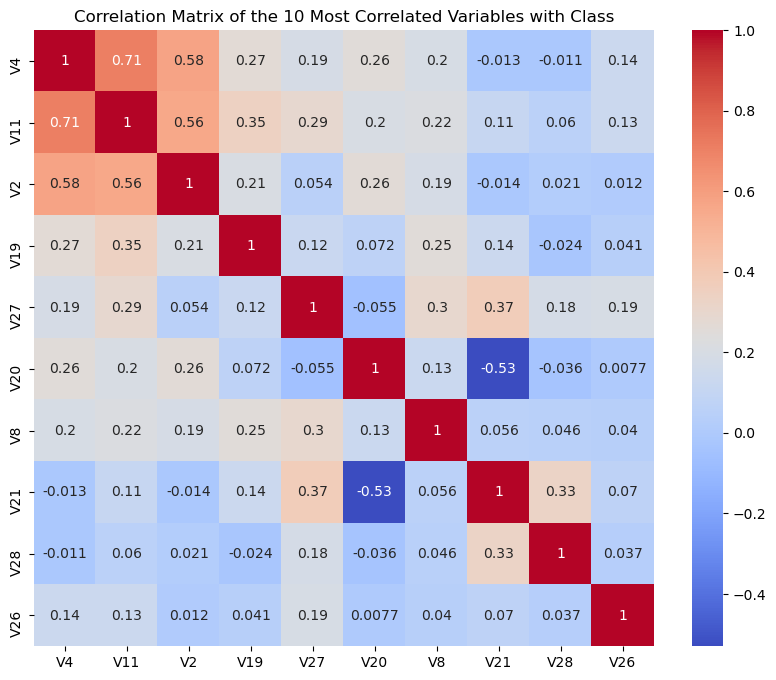

In [6]:
correlation_matrix = df.corr()
top_correlations = correlation_matrix['Class'].sort_values(ascending=False)[1:11]
top_corr_matrix = df[top_correlations.index].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of the 10 Most Correlated Variables with Class")
plt.show()


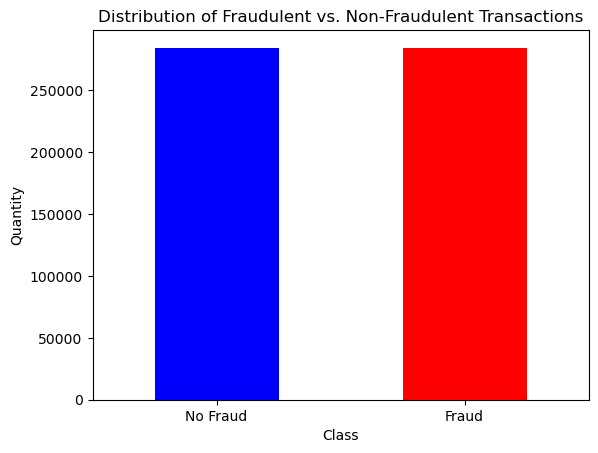

In [7]:
fraud_counts = df['Class'].value_counts()
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['No Fraud', 'Fraud'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

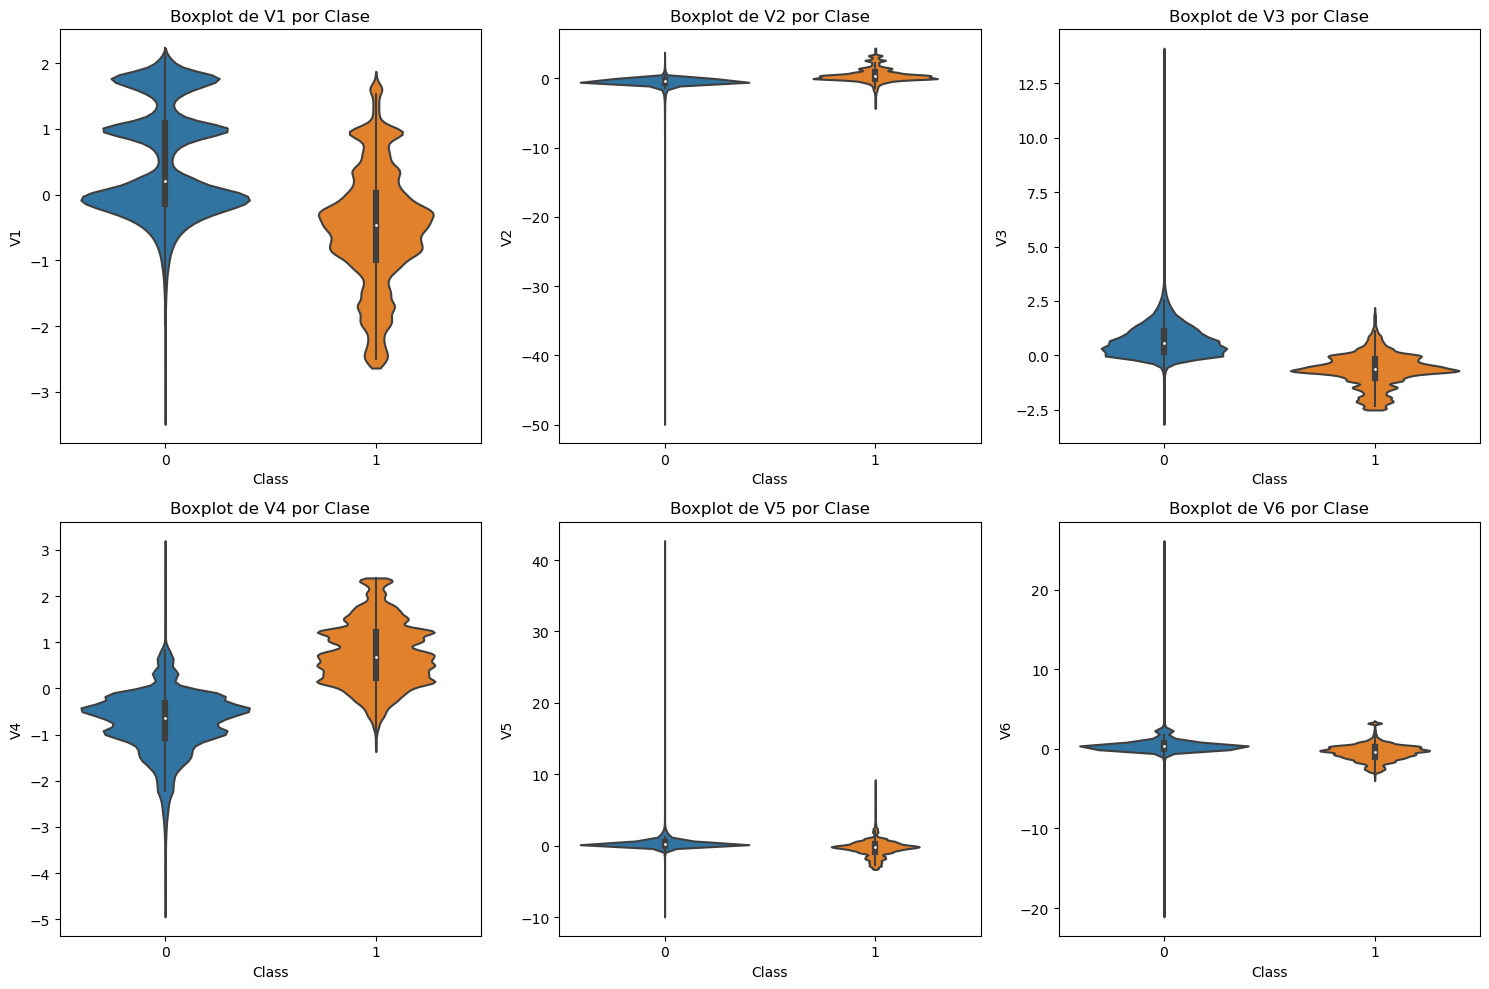

In [8]:
selected_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', ]

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.ravel()

for i, col in enumerate(selected_cols):
    sns.violinplot(x='Class', y=col, data=df, ax=axes[i], cut=0)
    axes[i].set_title(f'Boxplot de {col} por Clase')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


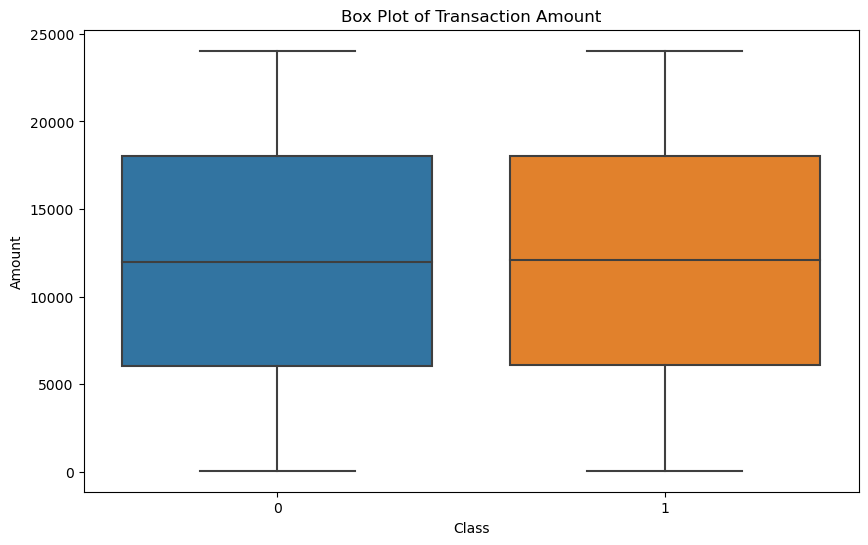

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()

## Model Training

In [10]:
from sklearn.model_selection import train_test_split

X=df.drop(['Class'],axis=1)
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

rus = RandomUnderSampler(sampling_strategy={0: 10000, 1: 10000}, random_state=42)

xgb_classifier = XGBClassifier(random_state=42)

# Select best 10 features
selector = SelectKBest(f_classif, k=10)

param_grid = {
    'n_estimators': [50],
    'max_depth': [3]
}

pipeline = Pipeline(steps=[
    ('undersampling', rus),
    ('feature_selection', selector),
    ('classification', xgb_classifier)
])

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

best_hyperparameters = grid_search.best_params_

print("Mejores hiperparámetros:")
print(best_hyperparameters)

Mejores hiperparámetros:
{'max_depth': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85149
           1       0.99      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



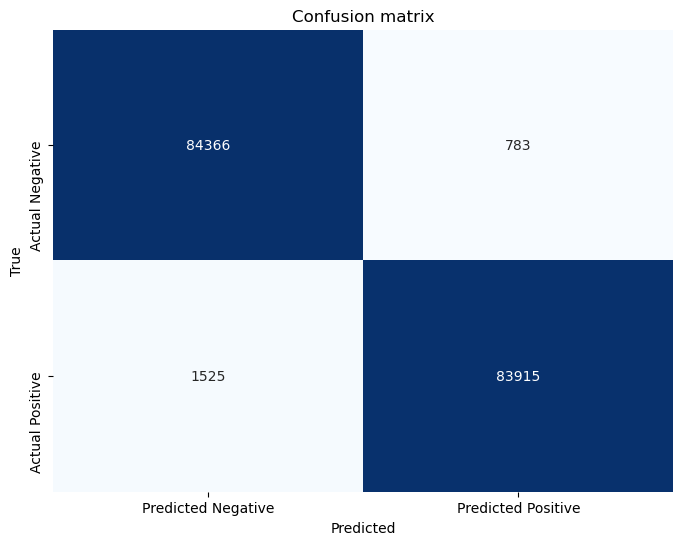

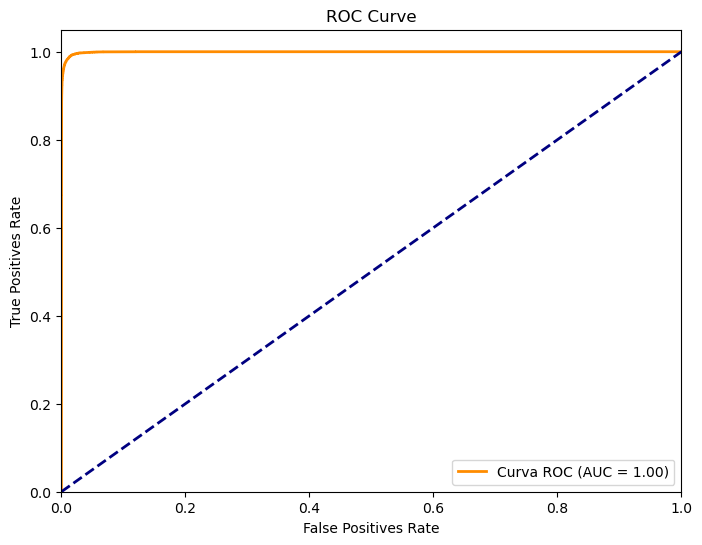

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)

# CONFUSION MATRIX
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

# ROC CURVE
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positives Rate')
plt.ylabel('True Positives Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Most important features:
V14: 0.737385630607605
V4: 0.07410216331481934
V12: 0.03541400283575058
V3: 0.030948752537369728
V1: 0.025375891476869583
V10: 0.023313041776418686
V9: 0.019792402163147926
V11: 0.019186414778232574
V7: 0.018214499577879906
V16: 0.01626729406416416


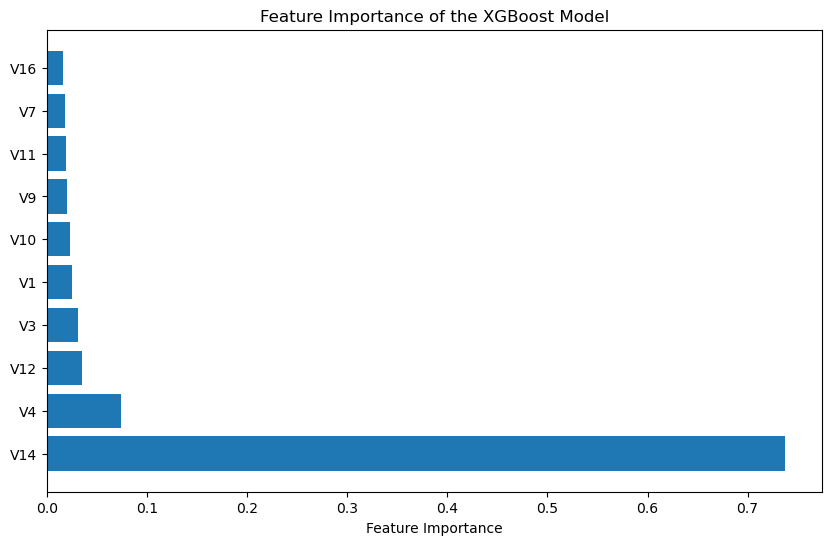

In [13]:
pipeline.fit(X_train, y_train)

feature_importances = pipeline.named_steps['classification'].feature_importances_
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support()
selected_features = X_train.columns[selected_feature_indices]

feature_importance_tuples = list(zip(selected_features, feature_importances))
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

print("Most important features:")
for feature, importance in feature_importance_tuples:
    print(f"{feature}: {importance}")

sorted_features, sorted_importances = zip(*feature_importance_tuples)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of the XGBoost Model')
plt.show()


In [14]:
import pickle

# Guardar el modelo en un archivo con pickle
with open('modelo_xgboost.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Cargar el modelo desde el archivo
with open('modelo_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)